In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
#%matplotlib inline

In [101]:
# Read CSV File and Add Totals Column 
population_stats = pd.read_csv('./Data/Crime/Statistics/ProvincePopulation.csv').sort_values('Population',ascending=False)
crime_stats = pd.read_csv('./Data/Crime/Statistics - RAW/SouthAfricaCrimeStats_v2.csv')
crime_stats['Total 2005-2016'] = crime_stats.sum(axis=1, numeric_only=True)

In [100]:
# Group Crime Counts by Province
crimes_by_province = crime_stats.groupby(['Province'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                                       '2009-2010','2010-2011','2011-2012','2012-2013',
                                                       '2013-2014','2014-2015','Total 2005-2016']]


In [95]:
# Group Crime Counts by Category
crimes_by_category = crime_stats.groupby(['Category'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]


In [81]:
# Group Crime Counts by Station
crimes_by_station = crime_stats.groupby(['Station'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]

In [82]:
#Add counts, Reset Index & Sort by Total Crimes Between 2005-2016
province_totals = crimes_by_province.sum().reset_index().sort_values('Total 2005-2016', ascending = False)
category_totals = crimes_by_category.sum().reset_index().sort_values('Total 2005-2016', ascending = False)
station_totals = crimes_by_station.sum().reset_index().sort_values('Total 2005-2016', ascending = False)

In [98]:
# Create Total Stations by Province Dataframe
total_province_stations = pd.DataFrame(crime_stats['Province'].value_counts()).reset_index()
total_province_stations['Total Stations'] = total_province_stations['Province']
total_province_stations.drop('Province',axis=1,inplace=True)
total_province_stations['Province'] = total_province_stations['index']
total_province_stations.drop('index',axis=1,inplace=True)

In [99]:
# Create All Province Totals Dataframe (Crime + Population Data)

# Set Index To Province (To add totals)
province_totals.set_index('Province',inplace=True)
total_province_stations.set_index('Province',inplace=True)
population_stats.set_index('Province',inplace=True)

# Add Totals to province_totals Dataframe
province_totals['Total Stations'] = total_province_stations['Total Stations']
province_totals['Population'] = population_stats['Population']
province_totals['Area'] = population_stats['Area']
province_totals['Density'] = population_stats['Density']

# Reset index back
province_totals = province_totals.reset_index()
total_province_stations = total_province_stations.reset_index()
population_stats = population_stats.reset_index()

province_totals.head(9)

,Province,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Total 2005-2016,Total Stations,Population,Area,Density
0,Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,6855654,3861,12272263,18178,675.1
1,Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,4792127,4050,5822734,129462,45.0
2,Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,3808898,5022,10267300,94361,108.8
3,Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,2370079,5292,6562053,168966,38.8
4,Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,1397044,2970,2745590,129825,21.1
5,Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,1370933,2322,4039939,76495,52.8
6,North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,1255258,2214,3509953,104882,33.5
7,Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,1201185,2673,5404868,125755,43.0
8,Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,546262,2457,1145861,372889,3.1


Text(0.5, 0, 'South African Provinces')

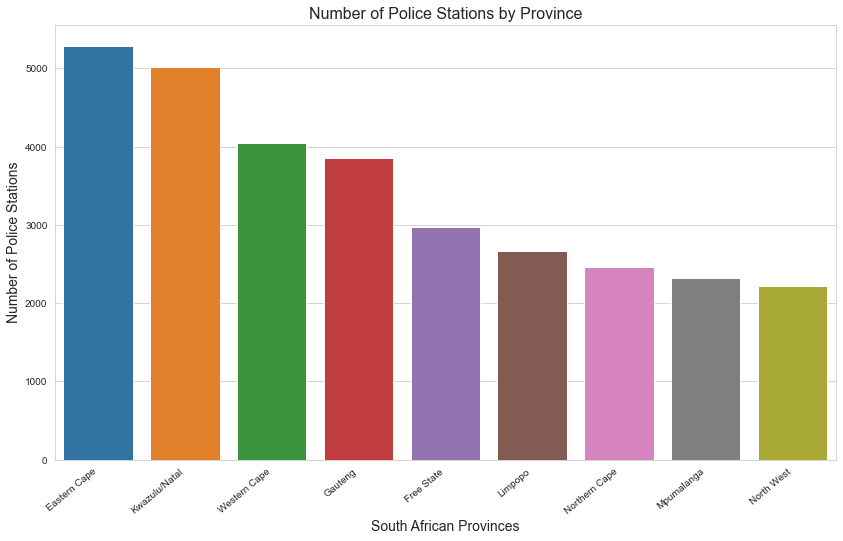

In [85]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=total_province_stations,x='Province',y='Total Stations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'South African Provinces')

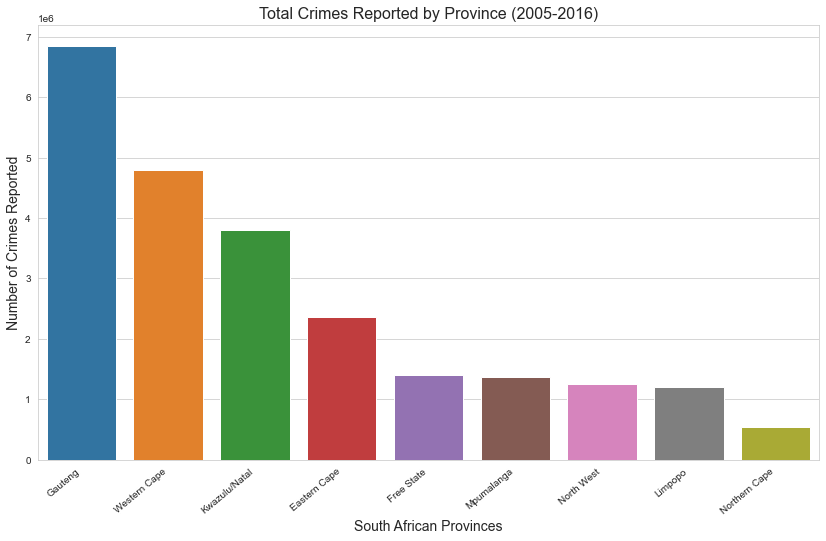

In [86]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=province_totals,x='Province',y='Total 2005-2016')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Province (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'Number of Crimes Reported')

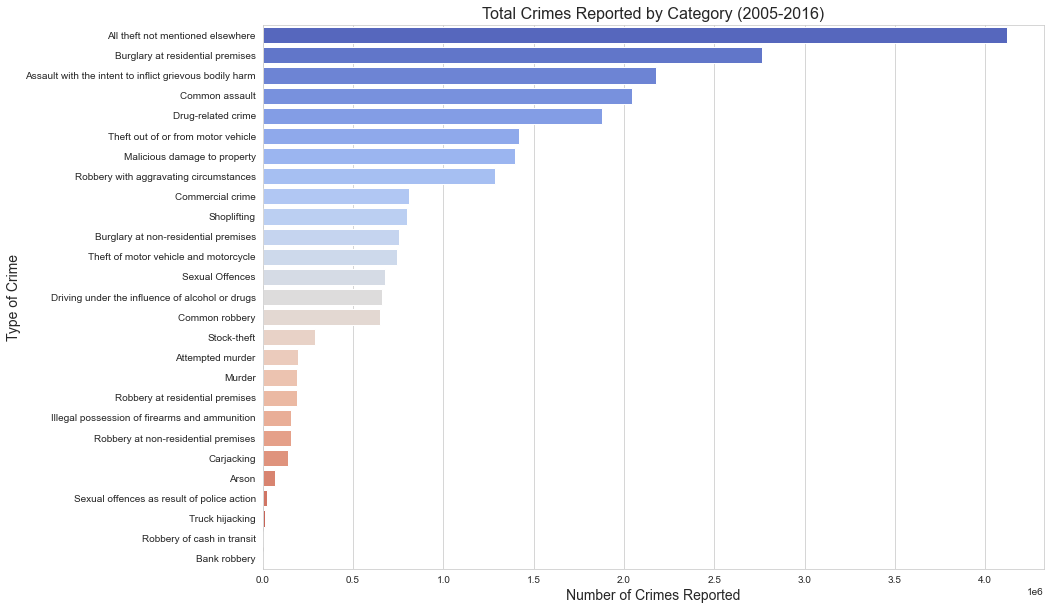

In [87]:
# Plot Figure
plt.figure(figsize=(14,10)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=category_totals,y='Category',x='Total 2005-2016',palette='coolwarm')
ax.set_title('Total Crimes Reported by Category (2005-2016)',fontsize=16)
ax.set_ylabel('Type of Crime',fontsize=14)
ax.set_xlabel('Number of Crimes Reported',fontsize=14)

Text(0.5, 0, 'South African Police Stations')

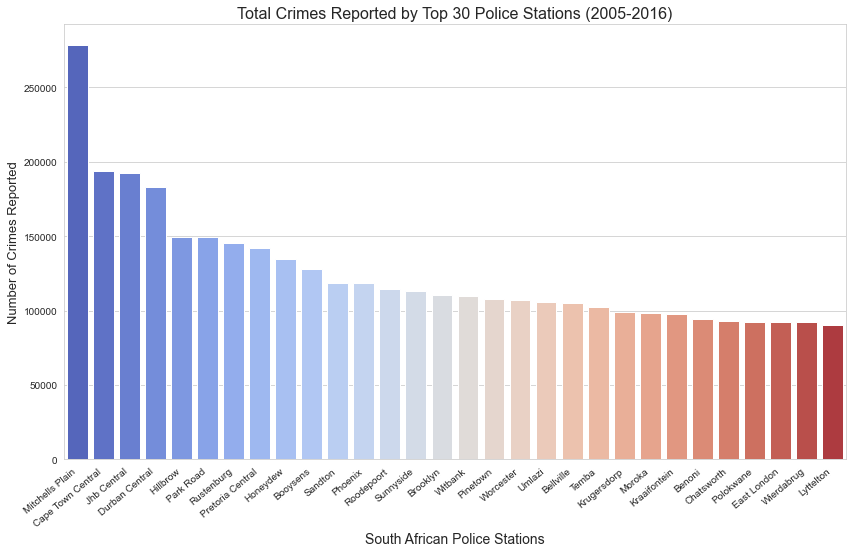

In [88]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.head(30),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Top 30 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

C:\Users\chris\AppData\Local\Temp\ipykernel_6280\3109653278.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:title={'center':'Correlation Heatmap'}>

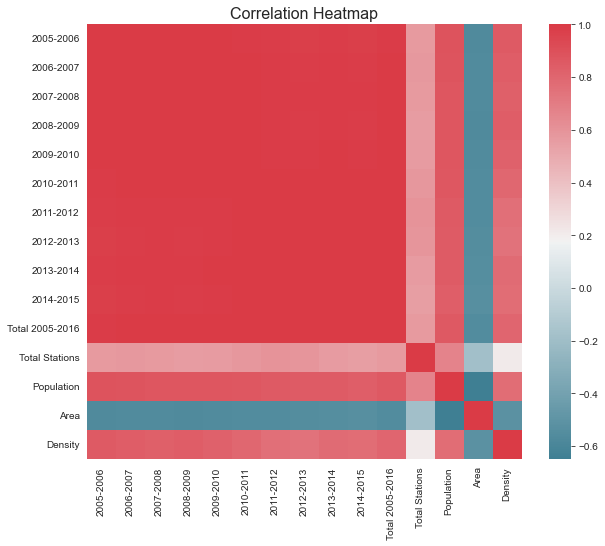

In [89]:
f,ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Heatmap',fontsize=16)
corr = province_totals.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [90]:
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

C:\Users\chris\AppData\Local\Temp\ipykernel_6280\1106271554.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals


,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Total 2005-2016,Total Stations,Population,Area,Density
2005-2006,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.98,0.98,0.98,0.99,0.57,0.89,-0.57,0.86
2006-2007,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.99,0.99,1.00,0.57,0.88,-0.57,0.84
2007-2008,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.57,0.83
2008-2009,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.56,0.88,-0.57,0.84
2009-2010,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.56,0.82
2010-2011,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.58,0.86,-0.56,0.80
2011-2012,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.60,0.86,-0.55,0.76
2012-2013,0.98,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.59,0.85,-0.55,0.74
2013-2014,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.57,0.85,-0.54,0.78
2014-2015,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.55,0.83,-0.54,0.77


In [91]:
#plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
#plt.plot(province_totals['Area'])
#plt.show()
pt = province_totals.drop(['Total Stations', 'Population', 'Area', 'Density', 'Total 2005-2016'], axis = 1)
pt.head(11)

,Province,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015
0,Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332
1,Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963
2,Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394
3,Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582
4,Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879
5,Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203
6,North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270
7,Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986
8,Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897
